<a href="https://colab.research.google.com/github/nguyenngochuen/LTPTDL2/blob/main/22634871_NguyenNgocHuyen_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soham1024/bitcoin-time-series-data-till-02082020")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/soham1024/bitcoin-time-series-data-till-02082020/versions/1


In [34]:
! pip install chart_studio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from plotly import tools
from chart_studio import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns

#import os
#print(os.listdir("../input"))

from subprocess import check_output
print(check_output(["ls", "./sample_data"]).decode("utf8"))

import plotly.io as pio

# Set renderer to browser (confirmed working for you)
pio.renderers.default = "colab"

anscombe.json
california_housing_test.csv
california_housing_train.csv
mnist_test.csv
mnist_train_small.csv
README.md



In [36]:

import pandas as pd

# Read the data without parsing dates
data = pd.read_csv("Bitcoin Historical Data.csv")

# Display the first few rows to understand the structure
print(data.head())

# Convert the relevant column to datetime (assuming the first column contains date strings)
data['Timestamp'] = pd.to_datetime(data.iloc[:, 0])

# Optionally, drop the old Date column if you no longer need it
data.drop(columns=data.columns[0], inplace=True)  # Uncomment if needed

# Now 'data' contains the correctly formatted datetime values
print(data.head())

           Date     Price      Open      High       Low     Vol. Change %
0  Aug 02, 2020  11,105.8  11,802.6  12,061.1  10,730.7  698.62K   -5.91%
1  Aug 01, 2020  11,803.1  11,333.2  11,847.7  11,226.1  611.47K    4.14%
2  Jul 31, 2020  11,333.4  11,096.5  11,434.8  10,964.6  530.95K    2.14%
3  Jul 30, 2020  11,096.2  11,105.8  11,164.4  10,861.6  501.14K   -0.09%
4  Jul 29, 2020  11,105.9  10,908.4  11,336.5  10,771.8  576.83K    1.81%
      Price      Open      High       Low     Vol. Change %  Timestamp
0  11,105.8  11,802.6  12,061.1  10,730.7  698.62K   -5.91% 2020-08-02
1  11,803.1  11,333.2  11,847.7  11,226.1  611.47K    4.14% 2020-08-01
2  11,333.4  11,096.5  11,434.8  10,964.6  530.95K    2.14% 2020-07-31
3  11,096.2  11,105.8  11,164.4  10,861.6  501.14K   -0.09% 2020-07-30
4  11,105.9  10,908.4  11,336.5  10,771.8  576.83K    1.81% 2020-07-29


In [37]:

import pandas as pd

# Assuming 'data' is your DataFrame already loaded

# Fill NaNs for 'Vol.' and 'Price' with zeroes
data['Vol.'] = data['Vol.'].fillna(value=0)
data['Price'] = data['Price'].fillna(value=0)
data['Change %'] = data['Change %'].fillna(value=0)

# Fill NaNs for OHLC data using forward fill
data['Open'] = data['Open'].ffill()
data['High'] = data['High'].ffill()
data['Low'] = data['Low'].ffill()

data.head(5)

,Price,Open,High,Low,Vol.,Change %,Timestamp
0,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%,2020-08-02
1,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%,2020-08-01
2,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%,2020-07-31
3,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%,2020-07-30
4,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%,2020-07-29


In [38]:

import pandas as pd
import datetime
import pytz

# Create valid date range
start = datetime.datetime(2015, 1, 1, 0, 0, 0, tzinfo=pytz.UTC)
end = datetime.datetime(2018, 11, 11, 0, 0, 0, tzinfo=pytz.UTC)

# Ensure the 'Timestamp' column is timezone-aware
data['Timestamp'] = data['Timestamp'].dt.tz_localize('UTC', ambiguous='infer')  # Only if 'Timestamp' is naive

# Filter rows between start and end time and group by week (starting Monday)
weekly_rows = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
weekly_rows = weekly_rows.groupby(pd.Grouper(key='Timestamp', freq='W-MON')).first().reset_index()

# Display the first few rows
print(weekly_rows.head())

                  Timestamp  Price   Open   High    Low    Vol. Change %
0 2015-01-05 00:00:00+00:00  314.9  318.2  321.4  313.5  12.82K   -1.05%
1 2015-01-12 00:00:00+00:00  282.3  274.8  285.1  271.5  21.94K    2.70%
2 2015-01-19 00:00:00+00:00  221.3  269.3  269.1  217.1  95.50K  -17.84%
3 2015-01-26 00:00:00+00:00  210.6  215.9  216.6  203.4  37.48K   -2.46%
4 2015-02-02 00:00:00+00:00  263.3  269.2  276.9  247.3  50.26K   -2.20%


In [39]:

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Clean the 'Open' and 'Price' columns by removing commas and converting to float
weekly_rows['Open'] = weekly_rows['Open'].str.replace(',', '').astype(float)
weekly_rows['Price'] = weekly_rows['Price'].str.replace(',', '').astype(float)

# Create traces for Plotly
trace1 = go.Scatter(
    x=weekly_rows['Timestamp'],
    y=weekly_rows['Open'],
    mode='lines',
    name='Open'
)
trace3 = go.Scatter(
    x=weekly_rows['Timestamp'],
    y=weekly_rows['Price'],
    mode='lines',
    name='Weighted Avg'
)

layout = dict(
    title='Historical Bitcoin Prices (2015-2018) with the Slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='1y', step='month', stepmode='backward'),
                dict(count=36, label='3y', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

data = [trace1, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename="Time Series with Rangeslider")

In [44]:
 # Clean the 'Vol.' column by removing 'K' and converting to float
def clean_volume(volume):
    volume = volume.replace(',', '').strip()  # Remove commas and whitespace
    if 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1_000_000
    else:
        return float(volume)  # Direct conversion if no suffix

# Apply the cleaning function to the 'Vol.' column
weekly_rows['Vol.'] = weekly_rows['Vol.'].apply(clean_volume)

# Now you can create your plot
trace1 = go.Scatter(
    x=weekly_rows['Timestamp'],
    y=weekly_rows['Vol.'],
    mode='lines',
    name='Volume'
)

# Assuming you want to plot 'Open' and 'Price' as well
trace2 = go.Scatter(
    x=weekly_rows['Timestamp'],
    y=weekly_rows['Open'],  # Ensure 'Open' is already cleaned
    mode='lines',
    name='Bitcoin Price (Open)'
)

trace3 = go.Scatter(
    x=weekly_rows['Timestamp'],
    y=weekly_rows['Price'],  # Ensure 'Price' is already cleaned
    mode='lines',
    name='Weighted Avg'
)

layout = dict(
    title='Historical Bitcoin Prices (2015-2018) with the Slider',
    xaxis=dict(
        rangeselector=dict(
              buttons=list([
                  dict(count=1, label='1m', step='month', stepmode='backward'),
                  dict(count=6, label='6m', step='month', stepmode='backward'),
                  dict(count=12, label='1y', step='month', stepmode='backward'),
                  dict(count=36, label='3y', step='month', stepmode='backward'),
                  dict(step='all')
              ])
          ),
          rangeslider=dict(visible=True),
          type='date'
      )
  )

data = [trace1, trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename="Time Series with Rangeslider")

In [45]:
import pandas as pd
import plotly.graph_objs as go  # go is an alias for graph_objs
import plotly.io as pio

# Set renderer to browser (confirmed working for you)
pio.renderers.default = "colab"

# Function to convert columns with possible commas (from your original code)
def clean_numeric(column):
    return pd.to_numeric(column.str.replace(',', ''), errors='coerce')


# Check for NaN values after conversion
print("NaN values after conversion:")
print(weekly_rows[['Price', 'Vol.']].isnull().sum())

# Drop rows with NaN values
weekly_rows.dropna(subset=['Price', 'Vol.'], inplace=True)

# Verify data types and sample data
print("\nData types:")
print(weekly_rows.dtypes)
print("\nSample data:")
print(weekly_rows[['Price', 'Vol.']].head())

# Create the scatter plot
trace = go.Scatter(
    x=weekly_rows['Price'],
    y=weekly_rows['Vol.'],
    mode='markers',
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)

# Define the layout
layout = go.Layout(
    title='BTC Volume vs. USD',
    xaxis=dict(
        title='Weighted Price',
        title_font=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume BTC',
        title_font=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the plot in the browser
fig.show()

# Optional: Save to HTML for manual verification
fig.write_html("btc_volume_vs_usd_scatter.html")
print("Plot saved as 'btc_volume_vs_usd_scatter.html' for backup.")

NaN values after conversion:
Price    0
Vol.     0
dtype: int64

Data types:
Timestamp    datetime64[ns, UTC]
Price                    float64
Open                     float64
High                      object
Low                       object
Vol.                     float64
Change %                  object
dtype: object

Sample data:
   Price     Vol.
0  314.9  12820.0
1  282.3  21940.0
2  221.3  95500.0
3  210.6  37480.0
4  263.3  50260.0


Plot saved as 'btc_volume_vs_usd_scatter.html' for backup.


In [47]:
import pandas as pd

# Load the dataset with 'Timestamp' as an object
data = pd.read_csv('Bitcoin Historical Data.csv', parse_dates=[0])

# Convert the 'Timestamp' column to datetime and remove timezone info
data['Timestamp'] = pd.to_datetime(data.iloc[:, 0])

# Group the data by hour and take the first entry in each hour
data = data.groupby([pd.Grouper(key='Timestamp', freq='h')]).first().reset_index()

# Set 'Timestamp' as the index
data = data.set_index('Timestamp')

# Select only the 'Weighted_Price' column
data = data[['Price']]

# Forward fill missing values in the 'Weighted_Price' column
data['Price'].ffill()

# Display the first few rows of the processed data
print(data.head())


                    Price
Timestamp                
2010-07-18 00:00:00   0.1
2010-07-18 01:00:00  None
2010-07-18 02:00:00  None
2010-07-18 03:00:00  None
2010-07-18 04:00:00  None


In [48]:

# split data
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

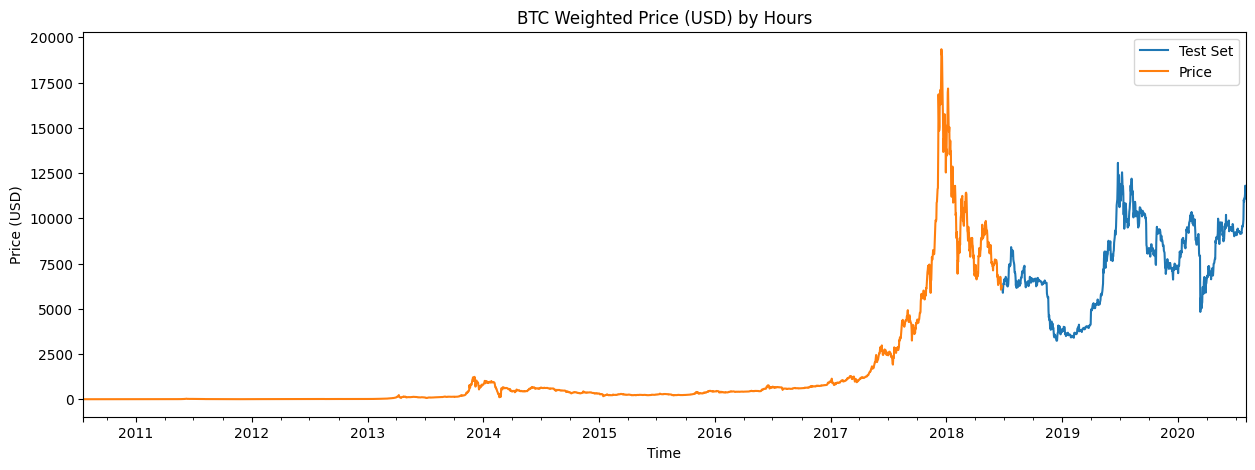

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Sample data loading (replace with your actual DataFrame)
# data_train = pd.read_csv('./your_train_data.csv')
# data_test = pd.read_csv('./your_test_data.csv')

# Replace commas and convert to float if necessary
data_train['Price'] = data_train['Price'].replace(',', '', regex=True).astype(float)
data_test['Price'] = data_test['Price'].replace(',', '', regex=True).astype(float)

# Drop NaN values from Price
data_train = data_train.dropna(subset=['Price'])
data_test = data_test.dropna(subset=['Price'])

# Data preprocess
training_set = data_train['Price'].values
training_set = np.reshape(training_set, (len(training_set), 1))

# Initialize the scaler
sc = MinMaxScaler()

# Fit and transform the training set
training_set = sc.fit_transform(training_set)

# Create X_train and y_train
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

# Reshape X_train for LSTM input
X_train = np.reshape(X_train, (len(X_train), 1, 1))
# Plotting training and test data
# Use suffixes to avoid overlapping column names
_ = data_test.rename(columns={'Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer', lsuffix='_train', rsuffix='_test') \
    .plot(figsize=(15, 5), title='BTC Weighted Price (USD) by Hours', style='')

plt.xlabel('Time')  # Set x-axis label if you have an index or timestamp
plt.ylabel('Price (USD)')  # Set y-axis label
plt.legend()  # Show legend
plt.show()

In [50]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
58/58 - 3s - 44ms/step - loss: 0.0665
Epoch 2/100
58/58 - 0s - 5ms/step - loss: 0.0530
Epoch 3/100
58/58 - 0s - 5ms/step - loss: 0.0453
Epoch 4/100
58/58 - 0s - 5ms/step - loss: 0.0422
Epoch 5/100
58/58 - 0s - 5ms/step - loss: 0.0342
Epoch 6/100
58/58 - 0s - 4ms/step - loss: 0.0310
Epoch 7/100
58/58 - 0s - 5ms/step - loss: 0.0255
Epoch 8/100
58/58 - 0s - 5ms/step - loss: 0.0243
Epoch 9/100
58/58 - 0s - 5ms/step - loss: 0.0221
Epoch 10/100
58/58 - 0s - 5ms/step - loss: 0.0201
Epoch 11/100
58/58 - 0s - 5ms/step - loss: 0.0173
Epoch 12/100
58/58 - 0s - 5ms/step - loss: 0.0161
Epoch 13/100
58/58 - 0s - 5ms/step - loss: 0.0147
Epoch 14/100
58/58 - 0s - 5ms/step - loss: 0.0130
Epoch 15/100
58/58 - 0s - 5ms/step - loss: 0.0118
Epoch 16/100
58/58 - 0s - 5ms/step - loss: 0.0115
Epoch 17/100
58/58 - 0s - 5ms/step - loss: 0.0104
Epoch 18/100
58/58 - 0s - 6ms/step - loss: 0.0094
Epoch 19/100
58/58 - 0s - 8ms/step - loss: 0.0090
Epoch 20/100
58/58 - 1s - 10ms/step - loss: 0.0086
Epoch 2

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,069 (781.52 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 133,380 (521.02 KB)

In [52]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [54]:

data_test['Price_Predict'] = predicted_BTC_price
data_all = pd.concat([data_test, data_train], sort=False)


In [55]:

data_all

,Price,Price_Predict
Timestamp,,
2018-06-26,6082.1,5897.253906
2018-06-27,6154.9,5971.946289
2018-06-28,5883.5,5694.129395
2018-06-29,6213.3,6031.952637
2018-06-30,6398.9,6223.149902
...,...,...
2018-06-21,6728.0,NaN
2018-06-22,6055.7,NaN
2018-06-23,6167.3,NaN


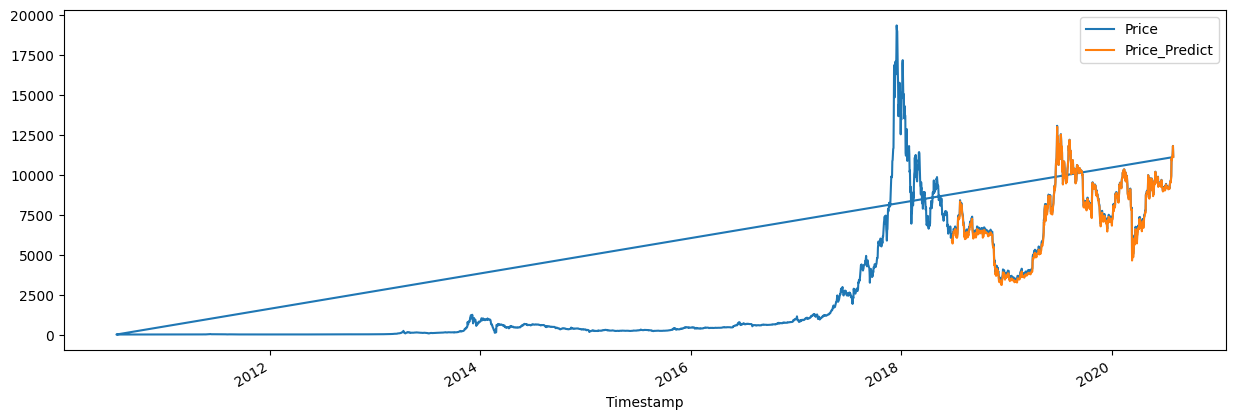

In [56]:

_ = data_all[['Price','Price_Predict']].plot(figsize=(15, 5))

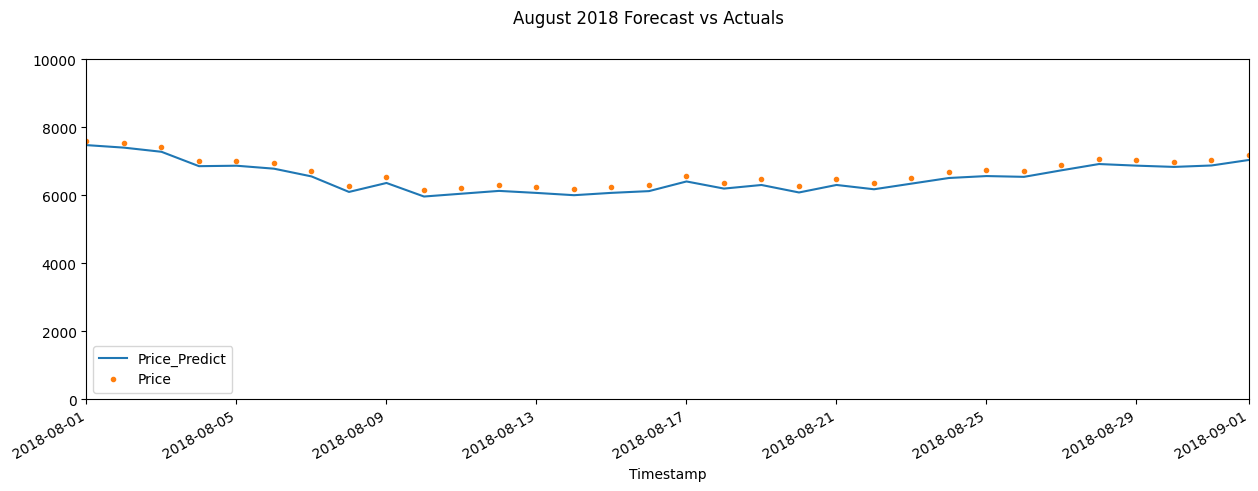

In [57]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Price_Predict','Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('August 2018 Forecast vs Actuals')

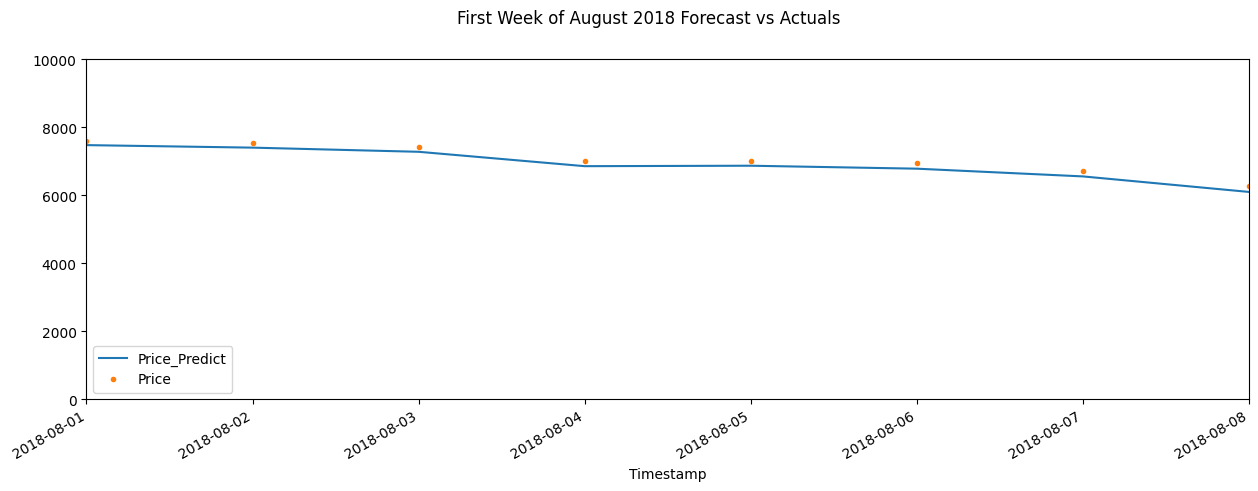

In [58]:

# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Price_Predict','Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forecast vs Actuals')


In [59]:

  #calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_test['Price'],
                   y_pred=data_test['Price_Predict'])


16373.083641585394

In [60]:

mean_absolute_error(y_true=data_test['Price'],
                   y_pred=data_test['Price_Predict'])

110.25872994808597

In [61]:
!pip install prophet
import seaborn as sns
import matplotlib.pyplot as plt
from prophet  import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [63]:

import pandas as pd

# Load the dataset with 'Timestamp' as an object
data = pd.read_csv('Bitcoin Historical Data.csv', parse_dates=[0])

# Convert the 'Timestamp' column to datetime and remove timezone info
data['Timestamp'] = pd.to_datetime(data.iloc[:, 0])

# Group the data by hour and take the first entry in each hour
data = data.groupby([pd.Grouper(key='Timestamp', freq='h')]).first().reset_index()

# Set 'Timestamp' as the index
data = data.set_index('Timestamp')

# Select only the 'Weighted_Price' column
data = data[['Price']]

# Forward fill missing values in the 'Weighted_Price' column
data['Price'].ffill()

# Chuyển đổi cột 'Price' thành số
data['Price'] = data['Price'].replace(',', '', regex=True).astype(float)
print(data['Price'].isna().sum())
data = data.dropna(subset=['Price'])  # Loại bỏ hàng có NaN
# Display the first few rows of the processed data
print(data.head())


84364
            Price
Timestamp        
2010-07-18    0.1
2010-07-19    0.1
2010-07-20    0.1
2010-07-21    0.1
2010-07-22    0.1


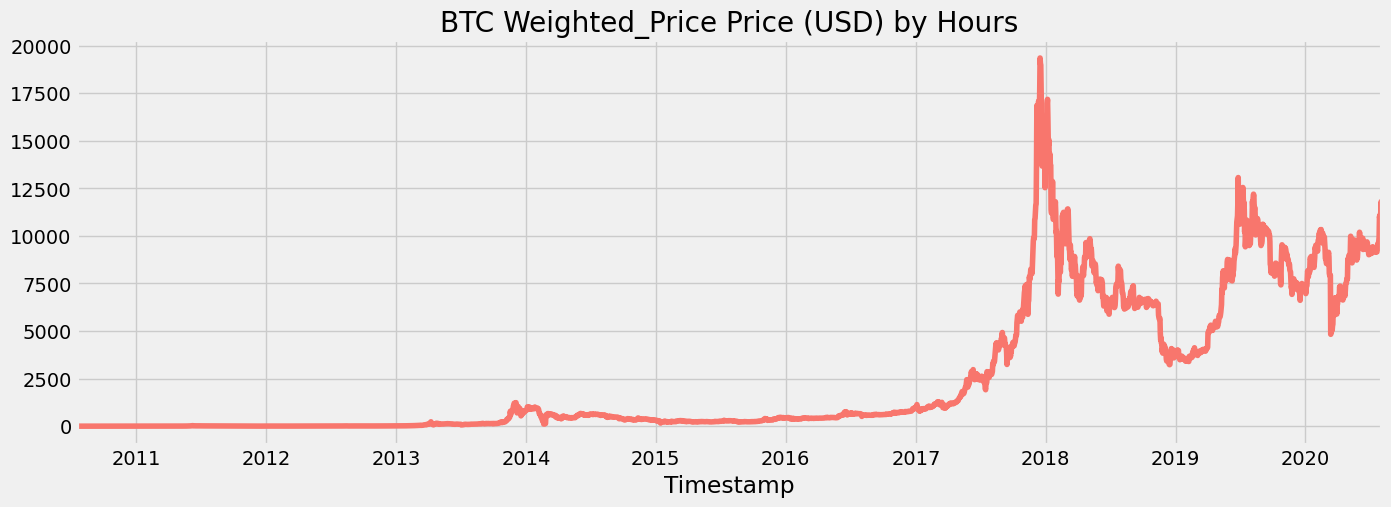

In [64]:

color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data['Price'].plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

In [65]:

split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()


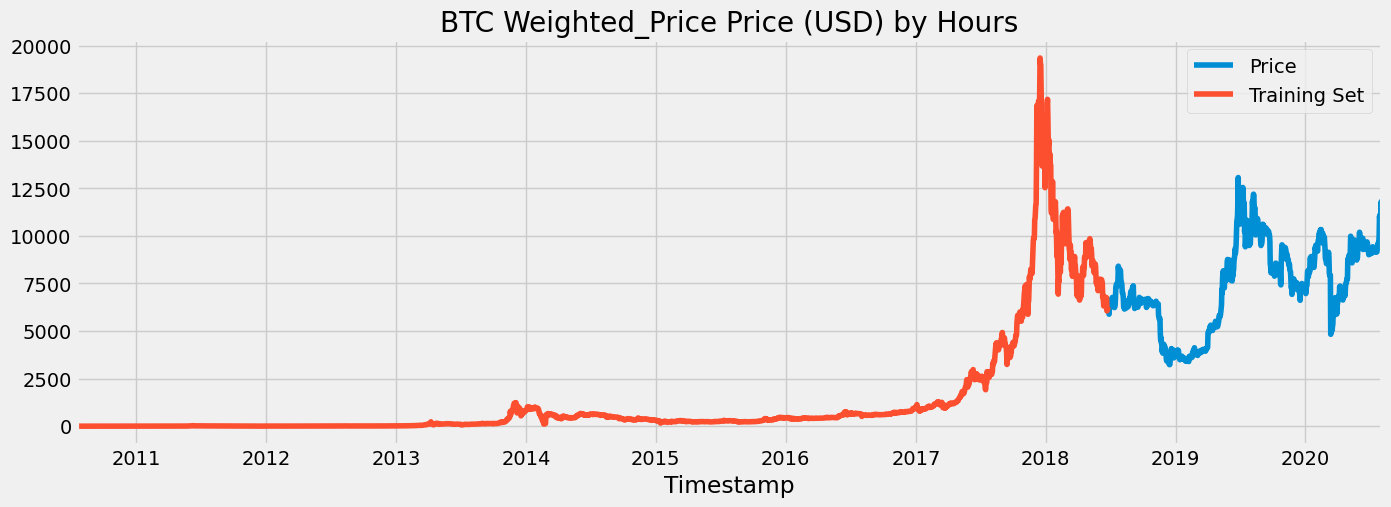

In [66]:

_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [67]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    # Đảm bảo df.index là datetime, nếu không thì chuyển đổi
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

    # Gán index datetime vào cột 'date'
    df['date'] = df.index

    # Trích xuất các đặc trưng thời gian
    df['hour'] = df['date'].dt.hour              # Giờ (0-23)
    df['dayofweek'] = df['date'].dt.dayofweek     # Ngày trong tuần (0 = Thứ Hai, 6 = Chủ Nhật)
    df['quarter'] = df['date'].dt.quarter         # Quý (1-4)
    df['month'] = df['date'].dt.month             # Tháng (1-12)
    df['year'] = df['date'].dt.year               # Năm
    df['dayofyear'] = df['date'].dt.dayofyear     # Ngày trong năm (1-365 hoặc 366)
    df['dayofmonth'] = df['date'].dt.day          # Ngày trong tháng (1-31)
    df['weekofyear'] = df['date'].dt.isocalendar().week  # Tuần trong năm (theo ISO)

    # Chọn các cột đặc trưng
    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth', 'weekofyear']]

    # Nếu có nhãn (label), trả về cả X và y
    if label:
        y = df[label]
        return X, y
    return X

In [68]:

data_train.head()

,Price
Timestamp,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1


In [69]:
X_train, y_train = create_features(data_train, label='Price')
X_test, y_test = create_features(data_test, label='Price')


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

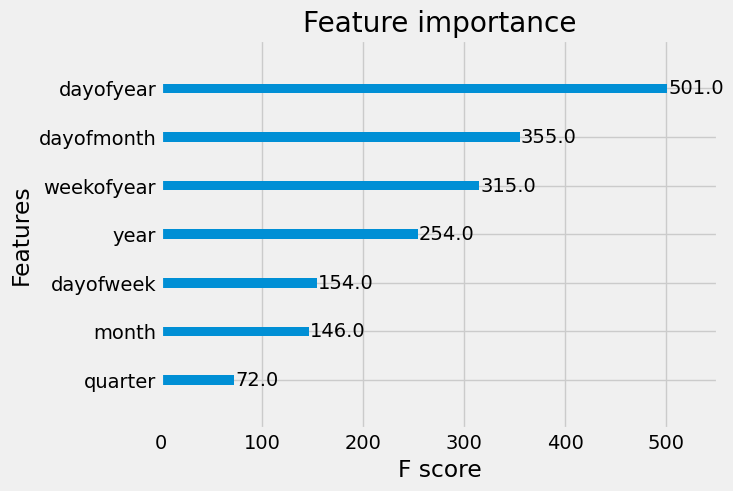

In [70]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

# Chuẩn bị DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Thiết lập tham số
params = {
    'objective': 'reg:squarederror',  # Cập nhật từ 'reg:linear'
    'min_child_weight': 10,
    'booster': 'gbtree',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
    'eval_metric': 'rmse'  # Metric đánh giá
}

# Huấn luyện với early stopping
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,  # Tương đương n_estimators
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=50,
    verbose_eval=False  # Đổi thành True để xem chi tiết
)

# (Tùy chọn) Vẽ tầm quan trọng của đặc trưng
plot_importance(model)

In [73]:

import xgboost as xgb
import pandas as pd

# Chuyển X_test thành DMatrix
dtest = xgb.DMatrix(X_test)

# Dự đoán với mô hình
data_test['Price_Prediction'] = model.predict(dtest)

# Kết hợp data_test và data_train
data_all = pd.concat([data_test, data_train], sort=False)